# Functional enrichment analysis with g:Profiler

In [1]:
library(tidyverse)
library(gprofiler2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Load DEG results

In [2]:
deg <- data.table::fread('../../metrics_summary/_m/male_specific_DE_4features.txt') %>%
    select(gencodeID, ensemblID, Symbol, logFC, "adj.P.Val")
deg %>% head(2)

gencodeID,ensemblID,Symbol,logFC,adj.P.Val
<chr>,<chr>,<chr>,<dbl>,<dbl>
ENSG00000157303.10,ENSG00000157303,SUSD3,-0.6828182,0.0006471114
ENSG00000166428.12,ENSG00000166428,PLD4,-0.6095456,0.0014670510


## Calculated enrichment and visual plot

In [3]:
save_ggplots <- function(fn, p, w, h){
    for(ext in c('.pdf', '.png', '.svg')){
        ggsave(paste0(fn, ext), plot=p, width=w, height=h)
    }
}

In [4]:
gostres <- gost(query=deg$ensemblID, organism="hsapiens", 
                correction_method="g_SCS", significant=TRUE)
gostres$result %>% 
    data.table::fwrite(file = "DEGs_functional_enrichment.tsv", sep="\t")
gostres$result %>% head(2)

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
1,query_1,TRUE,4.97118e-02,3,18,2,0.1111111,0.66666667,CORUM:1521,CORUM,p300-SMAD1-STAT3 complex,3627,773,CORUM:0000000
2,query_1,TRUE,5.44763e-05,3438,90,40,0.4444444,0.01163467,GO:0002376,GO:BP,immune system process,18123,1038,GO:0008150


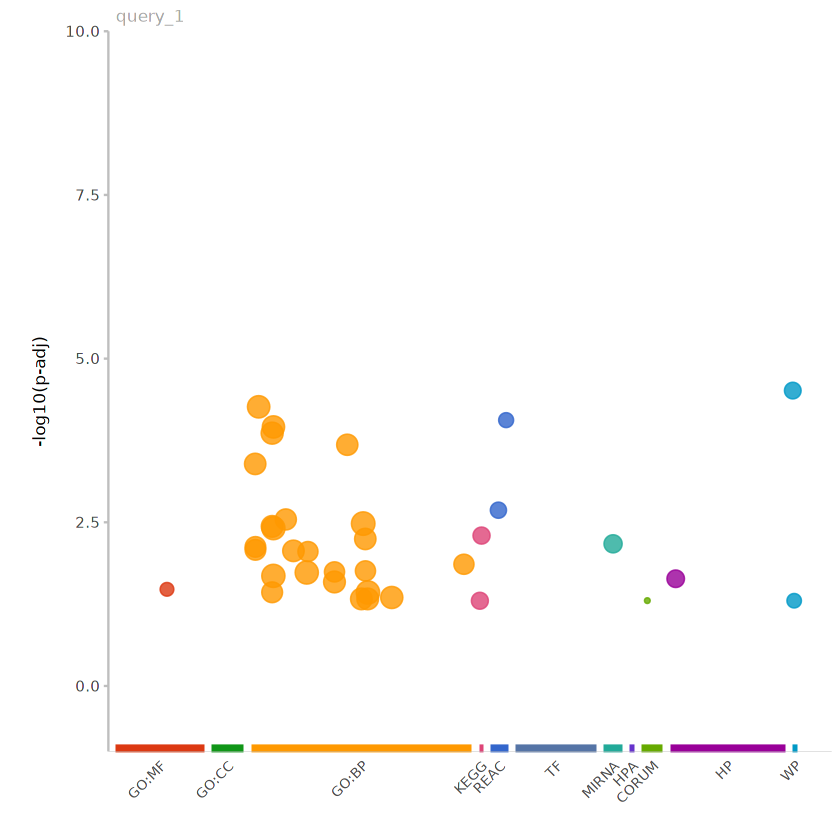

In [5]:
p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
print(p)
save_ggplots("DEGs_manhattan", p, 9, 5)

In [6]:
deg_sz = deg %>% filter(logFC > 0)
gostres <- gost(query=deg_sz$ensemblID, organism="hsapiens", 
                correction_method="g_SCS", significant=TRUE)
gostres$result %>% 
    data.table::fwrite(file = "upreg_DEGs_functional_enrichment.tsv", sep="\t")
gostres$result %>% head(5)

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
1,query_1,TRUE,0.010018418,3,12,2,0.1666667,0.66666667,CORUM:1521,CORUM,p300-SMAD1-STAT3 complex,3627,773,CORUM:0000000
2,query_1,TRUE,0.049673291,8,40,2,0.0500000,0.25000000,GO:0070878,GO:MF,primary miRNA binding,18679,9968,GO:0003723
3,query_1,TRUE,0.006333676,131,16,4,0.2500000,0.03053435,KEGG:04068,KEGG,FoxO signaling pathway,8000,239,KEGG:00000
4,query_1,TRUE,0.013638446,62,16,3,0.1875000,0.04838710,KEGG:04213,KEGG,Longevity regulating pathway - multiple species,8000,270,KEGG:00000
5,query_1,TRUE,0.027931048,79,16,3,0.1875000,0.03797468,KEGG:01521,KEGG,EGFR tyrosine kinase inhibitor resistance,8000,193,KEGG:00000


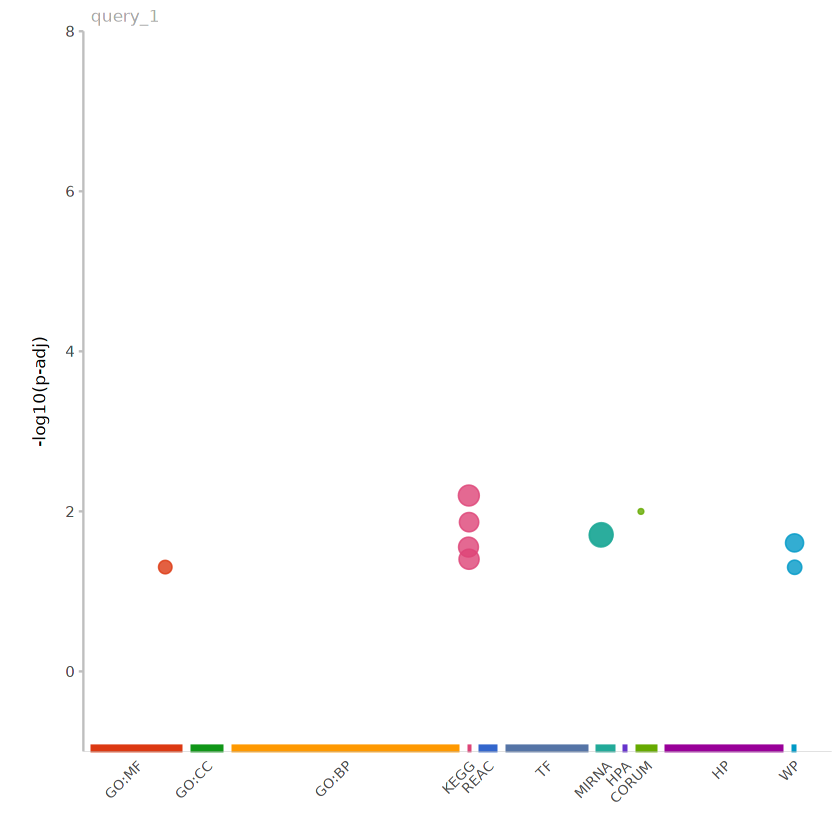

In [7]:
p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
print(p)
save_ggplots("upreg_DEGs_manhattan", p, 9, 5)

In [8]:
deg_ctl = deg %>% filter(logFC < 0)
gostres <- gost(query=deg_ctl$ensemblID, organism="hsapiens", 
                correction_method="g_SCS", significant=TRUE) 
gostres$result %>% 
    data.table::fwrite(file = "downreg_DEGs_functional_enrichment.tsv", sep="\t")
gostres$result %>% head(2)

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
1,query_1,TRUE,1.315792e-05,3438,50,28,0.56,0.00814427,GO:0002376,GO:BP,immune system process,18123,1038,GO:0008150
2,query_1,TRUE,1.449021e-05,1507,50,19,0.38,0.01260783,GO:0001775,GO:BP,cell activation,18123,561,GO:0009987


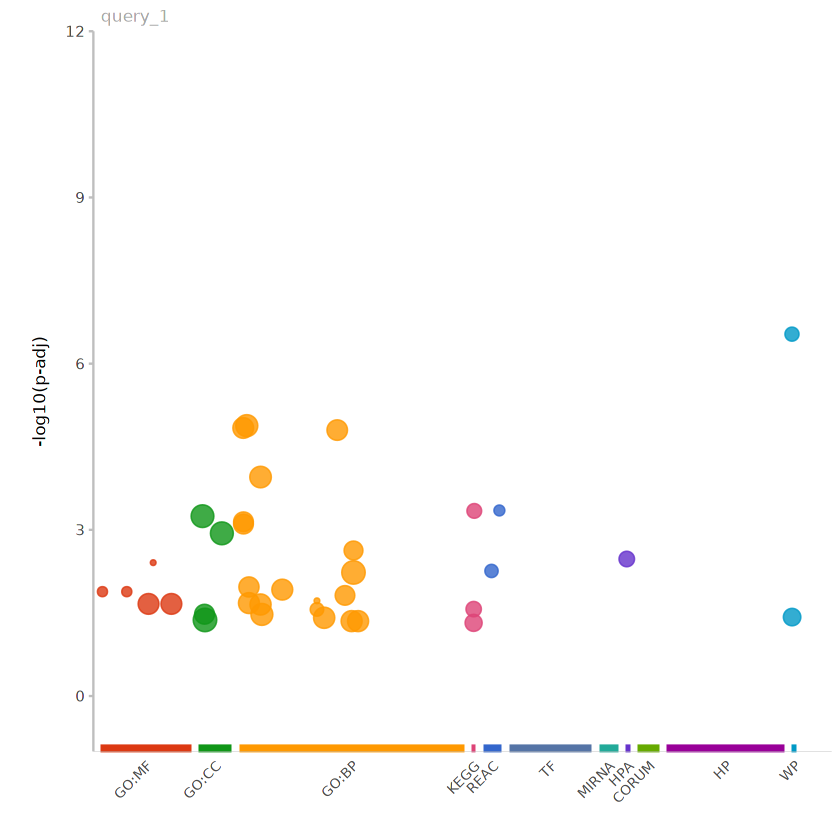

In [9]:
p <- gostplot(gostres, capped = FALSE, interactive = FALSE)
print(p)
save_ggplots("downreg_DEGs_manhattan", p, 9, 5)

## Reproducibility Information

In [10]:
Sys.time()
proc.time()
options(width = 120)
sessioninfo::session_info()

[1] "2021-07-14 18:02:12 EDT"

   user  system elapsed 
  8.528   0.271  15.293 

─ Session info ───────────────────────────────────────────────────────────────────────────────────────────────────────
 setting  value                       
 version  R version 4.0.3 (2020-10-10)
 os       Arch Linux                  
 system   x86_64, linux-gnu           
 ui       X11                         
 language (EN)                        
 collate  en_US.UTF-8                 
 ctype    en_US.UTF-8                 
 tz       America/New_York            
 date     2021-07-14                  

─ Packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────
 package     * version  date       lib source        
 assertthat    0.2.1    2019-03-21 [1] CRAN (R 4.0.2)
 backports     1.2.1    2020-12-09 [1] CRAN (R 4.0.2)
 base64enc     0.1-3    2015-07-28 [1] CRAN (R 4.0.2)
 bitops        1.0-7    2021-04-24 [1] CRAN (R 4.0.3)
 broom         0.7.8    2021-06-24 [1] CRAN (R 4.0.3)
 Cairo         1.5-12.2 2020-07-07 [1] CRAN (R 